# k-Means Clustering on the Iris Dataset (Elbow Method)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Load the Iris dataset
iris = load_iris()
X = iris.data


# Apply k-Means Clustering and Compute WCSS

In [2]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

# Plot the Elbow Method

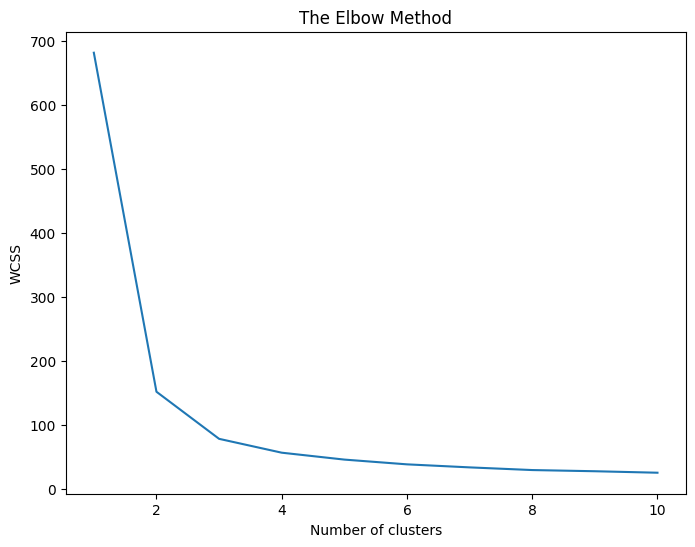

In [3]:
# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


# Load the MNIST Dataset

In [4]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load MNIST data
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


# Apply StandardScaler

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Logistic Regression without PCA

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time

# Logistic Regression without PCA
logisticRegr = LogisticRegression(solver='lbfgs', max_iter=1000)

# Measure time and accuracy
start_time = time.time()
logisticRegr.fit(X_train_scaled, y_train)
y_pred = logisticRegr.predict(X_test_scaled)
no_pca_time = time.time() - start_time
no_pca_accuracy = accuracy_score(y_test, y_pred)

print(f"Time without PCA: {no_pca_time:.2f} seconds")
print(f"Accuracy without PCA: {no_pca_accuracy:.4f}")


# Apply PCA and Logistic Regression with PCA

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality, keeping 95% variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Logistic Regression with PCA
logisticRegr_pca = LogisticRegression(solver='lbfgs', max_iter=1000)

# Measure time and accuracy with PCA
start_time = time.time()
logisticRegr_pca.fit(X_train_pca, y_train)
y_pred_pca = logisticRegr_pca.predict(X_test_pca)
pca_time = time.time() - start_time
pca_accuracy = accuracy_score(y_test, y_pred_pca)

print(f"Time with PCA: {pca_time:.2f} seconds")
print(f"Accuracy with PCA: {pca_accuracy:.4f}")
